## Model Robustness at The Model Evaluation Stage: Repeated Cross Validation

To enhance the reliability of model performance estimates, we use a repeated cross validation strategy. It addresses the variability in performance estimates due to different data splits, as a result reduces the dependecny of results to the random seed.    

Here, we try to show the impact of not-using/using repeated cross valiation evaluation on the final conclusion about the performance of models. We will use the adapted Diabetes dataset (from sklearn) to the classification in our experiment. 

### Importing Packages and Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

# Set a threshold for binary classification (e.g., using the median of y)
threshold = np.median(y)
y_binary = (y > threshold).astype(int)  # 1 for high risk, 0 for low risk

### Experiment 1: Using a single run of cross-validation with a specific "random" seed

Here, set the random seed to 2 (indeed, why 2?) and use this specific random seed for splitting data and control random processes in model training (for more reproducibility of resulst!).

In [2]:
random_state = 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=random_state)

# Create, fit, and predict using the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)


# Create, fit, and predict using the Linear Support Vector Classifier model
svc = SVC(kernel="linear", random_state=random_state)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Calculate accuracy score
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("SVC Accuracy:", accuracy_svc)
print("GBC Accuracy:", accuracy_gbc)

SVC Accuracy: 0.651685393258427
GBC Accuracy: 0.6741573033707865


After this very valid reproducible experiment, we claim and conclude that a Gradient boosting Cladssifer works better thatn a linear support vector classifier in classifying low/high risk diabetes patiens.

### Experiment 2: Repeated Cross Validation

Now, we repeat the same experiment for 100 times using different random seeds and report summary statistics.

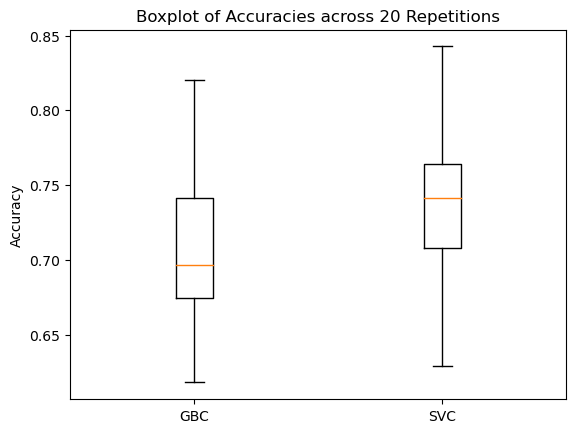

In [3]:
repetitions = 100

# Initialize a list to store accuracy scores
gbc_accuracy = []
svc_accuracy = []

# Repeat the train/test split 20 times with different random seeds
for i in range(repetitions):
    random_state = i  # Use i as the random seed
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=random_state)
    
    # Create and fit the Gradient Boosting Classifier model
    gbc = GradientBoostingClassifier(random_state=random_state)
    gbc.fit(X_train, y_train)

    svc = SVC(kernel="linear",random_state=random_state)
    svc.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_gbc = gbc.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    
    # Calculate accuracy score and append it to the list
    gbc_accuracy.append(accuracy_score(y_test, y_pred_gbc))
    svc_accuracy.append(accuracy_score(y_test, y_pred_svc))


# Plot a boxplot of the accuracies
plt.boxplot([gbc_accuracy, svc_accuracy])
plt.title('Boxplot of Accuracies across 20 Repetitions')
plt.xticks([1,2],['GBC','SVC'])
plt.ylabel('Accuracy')
plt.show()


In [4]:
print(np.mean(gbc_accuracy))
print(np.mean(svc_accuracy))

0.7064044943820227
0.735056179775281


In some repetitions (and with some random seeds) the GBC works better thatn SVC and in some others SVC works better than GBC, but overal SVC seems to be a better choice. This contradicts with the conclution of our previous experiment, but it is more reliable comparison and conclusion, and at the same time it is also reproducible.

To check the reliability of results, repeat the second expriment with a different set of random seeds (let's say 100 to 200 or any other arbitrary choice). Is our final conclusion valid one?

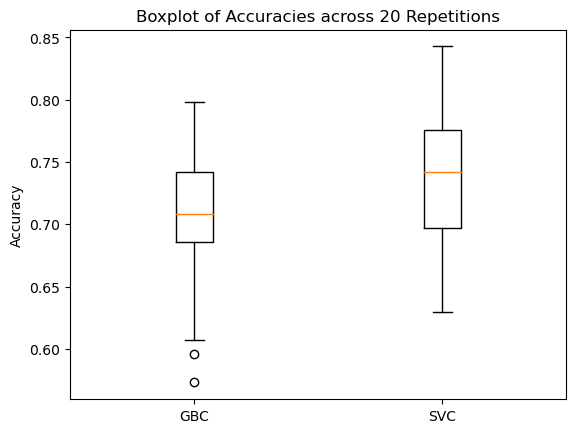

In [5]:
repetitions = 100

# Initialize a list to store accuracy scores
gbc_accuracy = []
svc_accuracy = []

# Repeat the train/test split 20 times with different random seeds
for i in range(repetitions, repetitions+101):
    random_state = i  # Use i as the random seed
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=random_state)
    
    # Create and fit the Gradient Boosting Classifier model
    gbc = GradientBoostingClassifier(random_state=random_state)
    gbc.fit(X_train, y_train)

    svc = SVC(kernel="linear",random_state=random_state)
    svc.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_gbc = gbc.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    
    # Calculate accuracy score and append it to the list
    gbc_accuracy.append(accuracy_score(y_test, y_pred_gbc))
    svc_accuracy.append(accuracy_score(y_test, y_pred_svc))


# Plot a boxplot of the accuracies
plt.boxplot([gbc_accuracy, svc_accuracy])
plt.title('Boxplot of Accuracies across 20 Repetitions')
plt.xticks([1,2],['GBC','SVC'])
plt.ylabel('Accuracy')
plt.show()

In [6]:
print(np.mean(gbc_accuracy))
print(np.mean(svc_accuracy))

0.7069751919012128
0.7371231505172989


Our final conclusion is valid. 